## Dog Classification

### Problem statement : The given .csv file contains the data from a classifier model that predicts if an image contains a dog. The first column contains information if the dog is in the image or not. The second column contains the classifier prediction, which is in the interval 0-100, with higher values meaning that the classifier is more confident that image contains a dog. 

### What is the value of the decision boundary that will maximize the accuracy of the model? Values greater than or equal to the decision boundary will be treated as positive. 

In [ ]:
import pandas as pd
data=pd.read_csv('dogsprediction.csv')
data

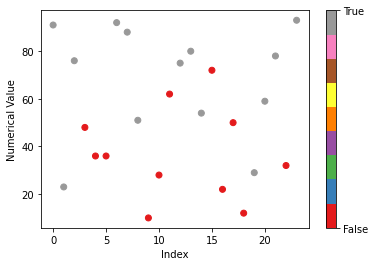

In [2]:
import matplotlib.pyplot as plt
data1 = {'Boolean Value': list(data['Dog is on image']),
        'Numerical Value': list(data['Classifier prediction'])}
df = pd.DataFrame(data1)
plt.scatter(df.index, df['Numerical Value'], c=df['Boolean Value'], cmap='Set1')
plt.xlabel('Index')
plt.ylabel('Numerical Value')
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['False', 'True'])
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
data2 = {'Boolean Value': list((data['Dog is on image'])),
        'Numerical Value': list(data['Classifier prediction'])} # Assuming boolean values are represented as 1 and 0

df = pd.DataFrame(data2)

# Separate the features and target variable
X = df[['Numerical Value']]
y = df['Boolean Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [4]:
data3=data.values.tolist()

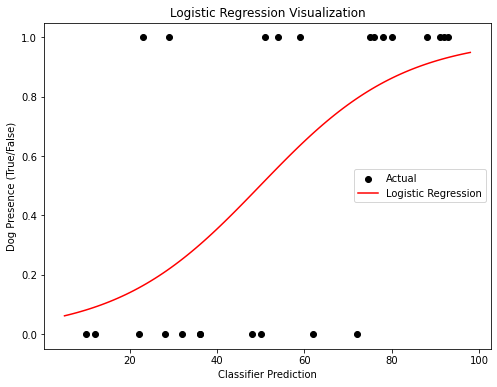

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Extracting features and labels
X = np.array([row[1] for row in data3]).reshape(-1, 1)
y = np.array([row[0] for row in data3])

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Plotting the decision boundary and classifier predictions
x_min, x_max = X.min() - 5, X.max() + 5
xx = np.linspace(x_min, x_max, 100).reshape(-1, 1)
decision_boundary = logreg.predict_proba(xx)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='black', label='Actual')
plt.plot(xx, decision_boundary, color='red', label='Logistic Regression')
plt.xlabel('Classifier Prediction')
plt.ylabel('Dog Presence (True/False)')
plt.title('Logistic Regression Visualization')
plt.legend()
plt.show()

#### We can see from the above diagram that the threshold must be somewhere around 50-60. Lets check by using log predictor.

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Extracting features and labels
X = np.array([row[1] for row in data3]).reshape(-1, 1)
y = np.array([row[0] for row in data3])

# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Predict probabilities
probs = logreg.predict_proba(X)[:, 1]

# Find threshold value
threshold = np.median(probs)
print("Threshold value:", threshold)

Threshold value: 0.5406255407433631


## The threshold boundary is 54.